In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
x_train.max()

255

In [8]:
x_train = x_train/255

In [9]:
x_test = x_test/255

In [10]:
x_train.max()

1.0

In [11]:
import matplotlib.pyplot as plt

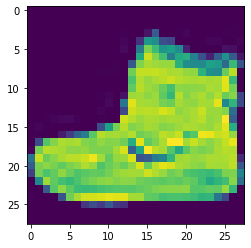

In [12]:
plt.imshow(x_train[0])

In [13]:
y_train[0]

9

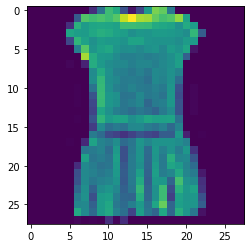

In [14]:
plt.imshow(x_train[3])

In [15]:
y_train[3]

3

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_train = to_categorical(y_train,10)

In [18]:
y_test = to_categorical(y_test,10)

In [19]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [20]:
y_train[3]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [47]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [48]:
from tensorflow.keras.models import Sequential

In [49]:
model = Sequential()

In [50]:
import numpy as np

In [32]:
x_train = np.stack((x_train,)*3,axis =-1)

In [34]:
x_train.shape

(60000, 28, 28, 3)

In [35]:
x_test = np.stack((x_test,)*3,axis =-1)

In [36]:
x_test.shape

(10000, 28, 28, 3)

In [51]:
model.add(Conv2D(filters=64,kernel_size=(4,4),input_shape=(28,28,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [52]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 64)        3136      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 32)          32800     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [54]:
model.fit(x_train,y_train,verbose=1,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.4631 - accuracy: 0.8291
Epoch 2/5
1875/1875 [==============================] - 63s 34ms/step - loss: 0.3121 - accuracy: 0.8848
Epoch 3/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2686 - accuracy: 0.9001
Epoch 4/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2413 - accuracy: 0.9087
Epoch 5/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2168 - accuracy: 0.9182


In [55]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2816 - accuracy: 0.9006


[0.28161686658859253, 0.900600016117096]

In [56]:
from sklearn.metrics import classification_report

In [57]:
prediction = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [58]:
y_test = np.argmax(y_test,axis=1)

In [59]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.81      0.89      0.84      1000
           3       0.90      0.91      0.91      1000
           4       0.82      0.85      0.84      1000
           5       0.99      0.96      0.98      1000
           6       0.75      0.67      0.71      1000
           7       0.92      0.99      0.95      1000
           8       0.99      0.97      0.98      1000
           9       0.98      0.93      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

